<a href="https://colab.research.google.com/github/YanfuOu/CIS545/blob/Master/Yanfu_F24_HW4_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 5450 Homework 4: Machine Learning

*Due Date: **November 15th at 10:00PM EST**, 103 points total (= 85 autograded + 18 manually graded).*


# Imports/Setup
Run the following cells to set up the notebook.


**Before you begin:**
- Be sure to click "Copy to Drive" to make sure you're working on your own personal version of the homework
- Check the **pinned FAQ post** on Ed for updates! TAs work really hard to keep it updated with everything you might need to know or anything we might have failed to specify. Writing these HWs and test cases gets tricky since students always end up implementing solutions that we did not anticipate and thus could not have prepared the grader correctly for.
- **WARNING:** You MUST check that your notebook displays ALL visualizations on the Gradescope preview AND verify that the autograder finishes running and gives you your expected score (not a 0). (Ed [#251](https://edstem.org/us/courses/44790/discussion/3426442)).
  - **Penalty:** -10: If we have to resubmit your notebook to Gradescope for you after the deadline. (e.g. not naming your files correctly, not submitting `.py` and .`ipynb`, etc.).
  - **Penalty:** -5: If your notebook fails show up in the Gradescope preview of your `.ipynb` (e.g. `Large File Hidden Error`).
      - If you experience this issue, please try to remove print outputs the non-plot images in the notebook.
  - **Note:**  We will be manually checking your implementations and code for certain problems. If you incorrectly implemented a procedure using Scikit-learn and/or MLlib (e.g. creating predictions on training dataset, incorrectly process training data prior to running certain machine learning models, hardcoding values, etc.), we will be enforcing a penalty system up to the maximum value of points allocated to the problem. (e.g. if your problem is worth 4 points, the maximum number of points that can be deducted is 4 points).
  - **Note:** If your plot is not run or not present after we open your notebook, we will deduct the entire manually graded point value of the plot. (e.g. if your plot is worth 4 points, we will deduct 4 points).
  - **Note:** If your `.py` file is hidden because it's too large, that's ok! We only care about your `.ipynb` file.



Please make sure you enter your **8 digit Penn ID** in the  student ID field below.

In [1]:
%%capture
!pip install penngrader-client
from penngrader.grader import *

#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 61033141    # YOUR PENN-ID GOES HERE AS AN INTEGER

In [2]:

%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [3]:
grader = PennGrader('notebook-config.yaml', 'cis5450_fall24_HW4', STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 61033141

Make sure this correct or we will not be able to store your grade


In [4]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from collections import Counter
import seaborn as sns
# pytorch related packages
import torch
import torchvision
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from PIL import Image
from skimage import io, transform
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader

# stopwords from NLTK
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
%%capture
!apt update
!pip install kaggle

## Part 0: Set up GPU capabilities (1 point)

The cell below configures a CUDA device for use with PyTorch, if available.

Remember to enable the GPU in Colab:

Go to Runtime -> Change runtime type -> GPU.

In [6]:
# DO NOT MODIFY
torch.manual_seed(42) # For grading consistency
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

2.5.0+cu121
cuda:0


In [7]:
str(device)

'cuda:0'

In [8]:
# Grader Cell (1 points)
grader.grade(test_case_id = 'device', answer = str(device))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **Part I:** Preprocessing and Modeling in `scikit-learn` (45 points)

## **1.1** Data Loading and Preprocessing [0 Points]

### **1.1.1** Read and Load Data

We are using a CSV for this part, `winequalityN.csv` from a Kaggle [dataset](https://www.kaggle.com/datasets/dataregress/rajyellow46/wine-quality). The dataset contains 13 columns and over 6000 wine entries.

To get the data in here:
1. Go to this [Kaggle link](https://www.kaggle.com) and create a Kaggle account (unless you already have one)
2. Go to Account and click on "Create New API Token" to get the API key in the form of a json file `kaggle.json`
3. Upload the `kaggle.json` file to the default location in your Google Drive (Please **DO NOT** upload the json file into any _specific_ folder as it will be difficult for us to debug issues if you deviate from these instructions!).

This can be helpful for your project if you decide to use Kaggle for your final project or for future projects!

In [9]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

In [11]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [12]:
# Download dataset
!!kaggle datasets download -d rajyellow46/wine-quality

['Dataset URL: https://www.kaggle.com/datasets/rajyellow46/wine-quality',
 'License(s): other',
 'Downloading wine-quality.zip to /content',
 '',
 '  0% 0.00/98.0k [00:00<?, ?B/s]',
 '100% 98.0k/98.0k [00:00<00:00, 272kB/s]',
 '',
 '100% 98.0k/98.0k [00:00<00:00, 271kB/s]']

In [13]:
# Unzip folder in Colab content folder
!unzip /content/wine-quality.zip

Archive:  /content/wine-quality.zip
  inflating: winequalityN.csv        


In [14]:
# TODO: Read the csv file and save it to a dataframe called "wine_quality_df"
wine_quality_df = pd.read_csv("winequalityN.csv")

# Check out the first five rows
wine_quality_df.head(100)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,white,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6
96,white,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6
97,white,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.9956,2.89,0.30,10.1,4


### **1.1.2** Understanding Data

A good practice before approaching any data science problem, is to understand the data you will be working with. This can be through descriptive statistics, datatypes, or just a quick tabular visualization. We will be walking through such tasks through Pandas.

In [15]:
# display the datatypes and filled entries in `wine_quality_df`
wine_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [16]:
# display the descriptive statistics of `wine_quality_df`
wine_quality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Let's also verify if there are any null values in our dataset. We will remove all null rows in `wine_quality_df`

In [17]:
# drop all null rows

wine_quality_df.dropna(inplace=True)

## **1.2** EDA [subtotal 14 points]

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


### **1.2.1** Visualization [10 points]

#### (a) Quality Distribution [4 Points]

**Task:** Find the distribution of the quality of wine in our dataset. The range of values should be integers in the range of 3-9, so we're expecting to have one bar per quality. You are **required** to use the Seaborn library for this problem to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html).

**Requirements:**

You should use `wine_quality_df` for this problem.

Your plot must:
*   Be of size (8,6) and use `palette = 'viridis'`. (ignore the deprecated warning)
*   Have appropriate titles and labels.
*   Be clearly legible and should **not** have overlapping text or bars.

<ipython-input-18-f86fe958a965>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(wine_quality_df, x='quality', palette = 'viridis')


Text(0, 0.5, 'count')

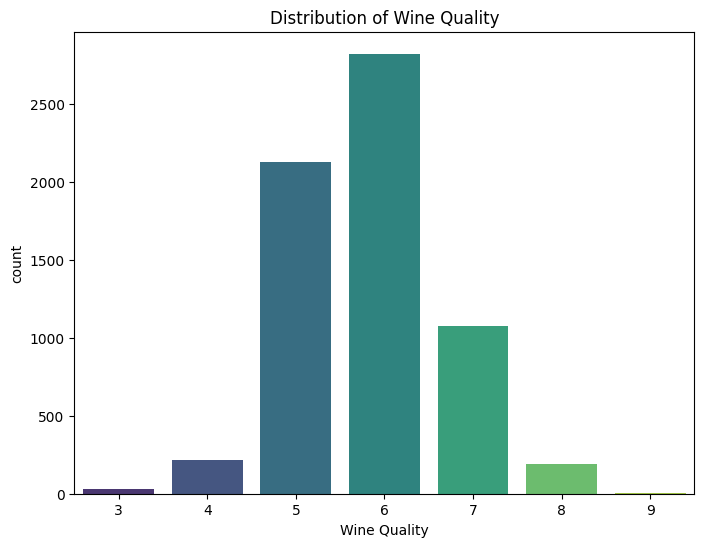

In [18]:
# TODO (4 Manually Graded Points)
# create a count plot which has a bar for each quality of wine, showing the frequency distribution of wine qualities
plt.figure(figsize = (8,6))
sns.countplot(wine_quality_df, x='quality', palette = 'viridis')
plt.title("Distribution of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("count")

#### (b) 3D Scatterplot [6 Points]

**Task:** We want to examine the relationship between three variables: `alcohol`, `pH`, and `density`. We also want to examine `quality` as well. You are **required** to use the Matplotlib library for this problem to create a [3D Scatterplot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html).

**Requirements:**

You should use `wine_quality_df` for this problem.

Your plot must:
*   Be of size (6,6).
*   Have each data point be colored accordingly by `quality`. The color mapping should be: 1-5 is red and 6-10 is green.
*   Have `alcohol content` in the x-axis, `pH level` in the y-axis, and `density` in the z-axis.
*   Have appropriate titles, axes labels, and a legend.
*   Be clearly legible and should **not** have overlapping text or bars.


**Very Helpful Resources:**

*   [3D Scatter Plotting in Python using Matplotlib](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/)
*   [List of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html)


Since the dataset is large, we'll first sample 200 rows (roughly 10%) from our `wine_quality_df` using the random seed 42 and save the sampled dataframe into `sample_wine_quality_df`.

In [19]:
# TODO (2 pts): Sample 200 random row using the random seed 42
# Make sure to reset index afterwards to allow the dataframe to be iterable when plotting below
RANDOM_SEED = 42
sampled_wine_quality_df = wine_quality_df.sample(n = 200, random_state = RANDOM_SEED)

In [20]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'sampling_for_visualization', answer = sampled_wine_quality_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


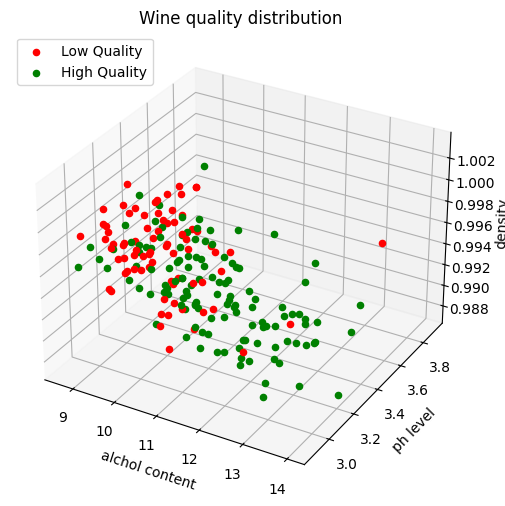

In [21]:

import matplotlib.pyplot as plt

# TODO (4 Manually Graded Points): create 3d scatter plot
# the comments will guide you through the process

# Extract the required columns from the dataframe into lists/containers
alchol_context = sampled_wine_quality_df["alcohol"].tolist()
pH_level = sampled_wine_quality_df['pH'].tolist()
density = sampled_wine_quality_df['density'].tolist()
quality = sampled_wine_quality_df['quality'].tolist()
# create a 3D scatter plot of size (6,6)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

# Create a Python dictionary with your quality and corresponding colors
quality_colors = { i: 'red' if i < 6 else 'green' for i in range(1, 10)}

point_color = [quality_colors[q] for q in quality]
# iterate through and plot datapoints

for i in range(len(alchol_context)):
  ax.scatter(alchol_context[i], pH_level[i], density[i], color = point_color[i])

# Set title and labels
plt.title("Wine quality distribution")
ax.set_xlabel("alchol content")
ax.set_ylabel("ph level")
ax.set_zlabel("density")
### STOP HERE ###
### DO NOT EDIT ###
ax.scatter([], [], [], c='r', marker='o', label=f'Low Quality')
ax.scatter([], [], [], c='g', marker='o', label=f'High Quality')

ax.legend(loc='upper left')
plt.show()

### **1.2.2** Correlation of Feature Variables [4 Points]

With multiple features, it can be somewhat exhausting to do bivariate analysis on every possible pair of features. While you certainly should, your first instinct should be to check for the correlation between features since certain models (e.g. Linear Regression) won't work well if we have strong multicollinearity.

Before finding our correlation matrix, we should filter out categorical features. Although quality is technically a categorical feature, we'll keep that column for now (and encode it later down the line). Drop any other categorical features and save this new dataframe into `num_df`.


In [22]:
# TODO: Create a dataframe of all numerical features
num_df = wine_quality_df.select_dtypes(include = ['float64', 'int64'])

_**Correlation Heatmap**_

**Task:** Create a correlation matrix using `num_df` and call it `corr_mat`. Using the correlation matrix, generate a correlation heatmap for these numeric features. You are required to use Seaborn library to create this [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Make sure your correlation heatmap meets the following criteria:
*   Ensure that your heatmap is sized (8,8): all feature labels should be visible on both the $x$-axis and $y$-axis
*   Use the `RdBu` color map to ensure that negative correlations are red and positive correlations are blue
*   Standardize the color scale so that -1 takes the darkest red color, 0 is totally white, and +1 takes the darkest blue color

In [23]:
num_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


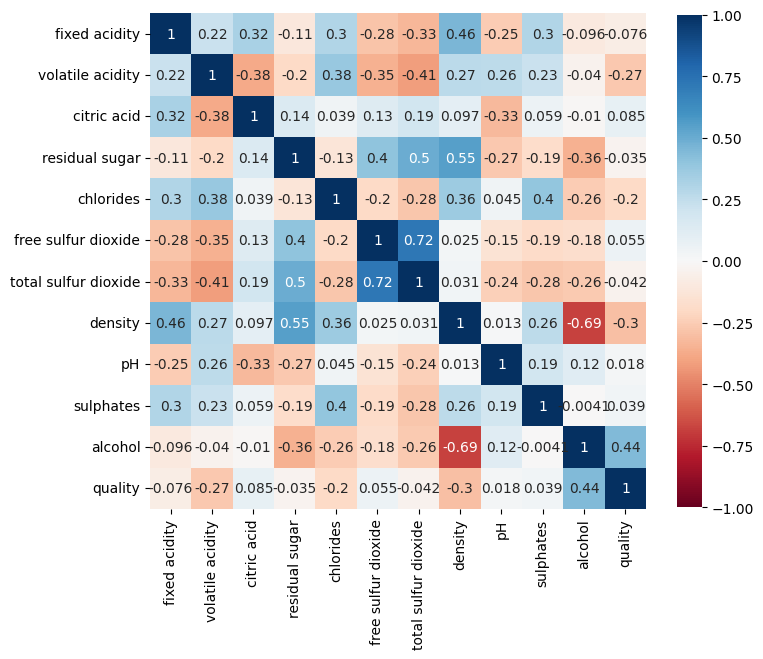

In [24]:
# TODO: Plot correlation heatmap (2 Manually Graded Points + 2 autograded points)
corr_mat = num_df.corr()
fig = plt.figure(figsize=(8,8))
sns.heatmap(corr_mat,
            annot=True,  # Display the correlation values on the heatmap
            cmap="RdBu",  # Red-Blue color map for negative/positive correlations
            vmin=-1, vmax=1,  # Standardize the color scale
            center=0,  # Center the color scale at 0
            square=True,  # Keep the heatmap square
            cbar_kws={"shrink": 0.8})  # Adjust the color bar size

plt.show()

In [25]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'wine_feature_correlation', answer = corr_mat)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


(2 manually graded points)

As an added exercise, based off of the correlation matrix above, write down what you believe to be the two most highly correlated pairs of features (by magnitude), and briefly explain the numerical intuition of what that correlation means. Note that you don't need any scientific explanation for why those variables are correlated.

**Pair #1: acidity and alchol**

**Pair #2: alchol and density**

Intuitively, alchol and acidity are strongly correlated because the higher the alcholic content of a drink, the more acidic it tasts. On a chemistry level, the higher the OH concentration, the more acidic the solution is.

Additionally, the more acidic a drink or solution is, the more dense it is. As explained above, more alchol content results in more acidicity. Thus alchol is strongly correlated with density.


## **1.3** Feature Encoding [subtotal 8 points]


### **1.3.1** Encoding Wine Type [4 Points]

Encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Task:**

*   You should use `wine_quality_df` for this problem.
*   Let's first determine the number of unique values for the `type` column and save that value in a new constant `NUM_UNIQUE_TYPES`


In [26]:
NUM_UNIQUE_TYPES = wine_quality_df['type'].nunique()
NUM_UNIQUE_TYPES

2

Since there are two unique values for wine quality (red and white), let's write a helper function to convert a string wine quality to an integer. As an example, the function can convert a wine type, like "white" to 0 and "red" to 1.

In [27]:
# TODO (2 pts): Convert the wine type to integers
def wine_type_to_int(wine_type: str) -> int:
  if wine_type == "white":
    return 0
  elif wine_type == "red":
    return 1


In [28]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'wine_type_encoding_funct', answer = (wine_type_to_int('white'), wine_type_to_int('red')))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, let's make a copy of `wine_quality_df` into `encoded_wine_quality_df` and encode the `type` column to numerical values, and rename the `type` column to `red_wine`.

In [29]:
# TODO: Encode the type column and save it
encoded_wine_quality_df = wine_quality_df.copy()
encoded_wine_quality_df['type'] = encoded_wine_quality_df['type'].apply(lambda x: wine_type_to_int(x))
encoded_wine_quality_df = encoded_wine_quality_df.rename(columns={'type': 'red_wine'})
encoded_wine_quality_df

,red_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'wine_type_encoding', answer = encoded_wine_quality_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.3.2** Encode Classes in 'Quality' Column [4 Points]

**Task:** We will be predicting the `quality` for our classification problem. We first want to transform our target into numerical values. Map the classes in the quality column in the following way:
*   0-5: 0
*   6-10: 1

This encoding represents low and high quality respectively. These will be the two classes we will try to predict using the other features about the wine.

You should use `encoded_wine_quality_df` for this problem. Save your results in `encoded_wine_quality_df`.

In [31]:
# TODO: create and apply a mapping
class_map =  {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:1,
    7:1,
    8:1,
    9:1,
    10:1
}
encoded_wine_quality_df['quality'] = encoded_wine_quality_df['quality'].map(class_map)
encoded_wine_quality_df
#TODO - MISSING SOME VALUES

,red_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [32]:
# Self-check
encoded_wine_quality_df['quality'].unique()

array([1, 0])

In [33]:
#Grader Cell (4 points)
grader.grade(test_case_id = 'wine_quality_encoding', answer = (encoded_wine_quality_df['quality']))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.4** Random Forest Classification (sklearn) [23 points]

### **1.4.1** Preprocessing: Create Features and Target and Split Data into Train and Test [4 Points]

Now that we have explored and cleaned our dataset, let's prepare it for a machine learning task. In this homework, you will work with various models and attempt to predict the `quality` of the wine.

The features will be all the variables in the dataset **except** `quality`, which will act as the label for our problem. First, store these two as `features` (pd.DataFrame) and `target` (pd.Series), respectively.

In [34]:
encoded_wine_quality_df.columns

Index(['red_wine', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [35]:
# TODO: store features dataframe into variable called "features"
features = encoded_wine_quality_df[['red_wine', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# TODO: store the classification target variable into "target"
target = encoded_wine_quality_df['quality']



Now, use Scikit-learn's [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split data for classification into training and testing sets. The split should be 80-20 meaning 80% for training and the rest for testing.

**_IMPORTANT_: Please set the `seed` variable to 42 and then set the parameter to `random_state = seed`** and store the resulting splits as `X_train, X_test, y_train,` and `y_test`.

If you want to understand the purpose of *seed*, please feel free read over this concise yet thorough explanation on [StackOverflow](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do).

In [36]:
# TODO: Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size =0.2, random_state = RANDOM_SEED)


Let's also use a StandardScaler to standardize the set of X values. Make sure that there's no data leakage, in that the scaler should be trained ONLY on the training data. Name into `X_train_scaled` and `X_test_scaled`.

In [37]:
# TODO: Use a StandardScaler to scale the X features
scaler = StandardScaler()
scaler2 = StandardScaler()

# Fit the scaler on the training data and transform the X_train features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the X_test features (without refitting)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Grader cell (4 points)
grader.grade(test_case_id = 'train_test_split_classification', answer = (X_train_scaled, X_test_scaled, y_train, y_test))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.4.2** Random Forest Classification without Grid Search [4 points]

#### Raw Random Forest Classifier

Fit a Random Forest classifier on the `X_train` and `y_train` with the hyperparameters provided below. Calculate the accuracy of the model on the test set using the `score` method and store it in a variable named `rf_acc`. We're later going to use grid search to tune the hyperparameters, but for now, let's use the parameters below.

**Task:**

*   Read the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for Random Forest Classifier.
*   For hyperparameters, set:
    - `class_weight = 'balanced'`
    - `n_estimators = 50`
    - `max_depth = 10`
    - `random_state = 42`
*   Train the random forest classifier model and evaluate it using the `score` method.
*   Save your score in a variable `rf_acc`.
*   Use the scaled X data for all remaining sections

In [39]:
# TODO: Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# TODO: Initialize model with given parameters and fit it on the training set
rf_classifier = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=50,
    max_depth=10,
    random_state=42
)

rf_classifier.fit(X_train_scaled, y_train)

# TODO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = rf_classifier.predict(X_test_scaled)

# TODO: Find the accuracy and store the value in `rf_acc`
rf_acc = accuracy_score(y_test, y_pred)

# sanity check
rf_acc

0.8128383604021655

In [40]:
#Grader Cell (4 points)
grader.grade(test_case_id = 'check_random_forest_raw', answer = (rf_acc))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.4.3** Random Forest Classification with Grid Search and Cross Validation [15 points]

Now, we're interested in tuning the hyperparameters of the random forest model to see if we're able to achieve a higher testing score. We will be using sklearn's `GridSearchCV` utility to do this. After defining a set of parameters and respective values to check, grid search will check through all combinations of those parameters and test using a subset of the training data (cross validation). To learn more about `GridSearchCV`, we've attached the documentation [here](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html)

Complete the following:


1.   First, let's define the parameter grid. We're interested in tuning the following set of hyperparameters below with their corresponding ranges of values. Name the parameter grid `param_grid`.


*   `n_estimators`: [50, 100, 150]
*   `max_depth`: [5, 10, 15]
*   `class_weight`: ['balanced']
*   `random_state`: [42]

2. Second, let's instantiate our random forest model in the variable `random_forest_model` with default initialization.

3. Then, define the GridSearchCV object, using the estimator `random_forest_model`, the param grid defined above, a `cv` (cross validation) set to 5, scoring set to 'accuracy', and `verbose` set to `True`

4.   Then, fit the model and print out the best parameters / cross validation score.

5.  Finally, we'll use our best model and evaluate it against our test data. Save the accuracy into `test_accuracy`





In [41]:
# TODO: Using cross validation and grid search to tune the hyperparameters of the random forest model

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'class_weight': ['balanced'],
    'random_state': [42]
}

# Instantiate the random forest model
random_forest_model = RandomForestClassifier()

# Define the grid search object
grid_search = GridSearchCV(
    estimator=random_forest_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=True
)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and cross validation score

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 150], 'random_state': [42]},
             scoring='accuracy', verbose=True)

In [42]:
best_model = grid_search.best_estimator_
test_accuracy =  best_model.score(X_test_scaled, y_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.822892498066512


In [43]:
# Grader cell
grader.grade(test_case_id = 'rf_grid_search', answer = (param_grid, test_accuracy))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.4.4** Random Forest Feature Importance [5 points]

Now, let's find the relative feature importance for predicting the quality of wine. Use the best model from above, and create a Seaborn bar plot to display the feature importance. Save the feature importances into `feature_importances`.

Specifications for plot:


*   The feature importances should be sorted in descending order
*   Use a Seaborn bar plot. If you're confused on the syntax, the documentation is [here](https://seaborn.pydata.org/generated/seaborn.barplot.html)
*   Use a figure size of (10, 6)
*   Properly label the title and axes.



In [44]:
best_model

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=150,
                       random_state=42)

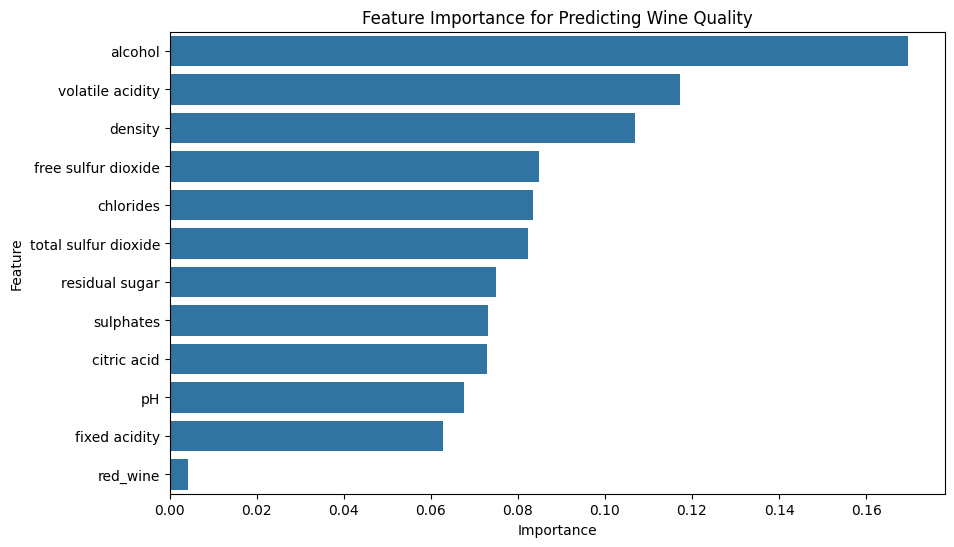

In [45]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# TODO (Manually graded 3 points + 2 points autograded): Create a bar plot for the feature importances
feature_importances = best_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Plot feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance for Predicting Wine Quality')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [46]:
# Grader cell
grader.grade(test_case_id = 'rf_feature_importance', answer = (feature_importances))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.4.5** Random Forest Confusion Matrix [4 points]

Finally, we will make use of a **confusion matrix**. It is used to consolidate the predictive performance of a model into a single table. In a binary classification scenario, it looks like this:

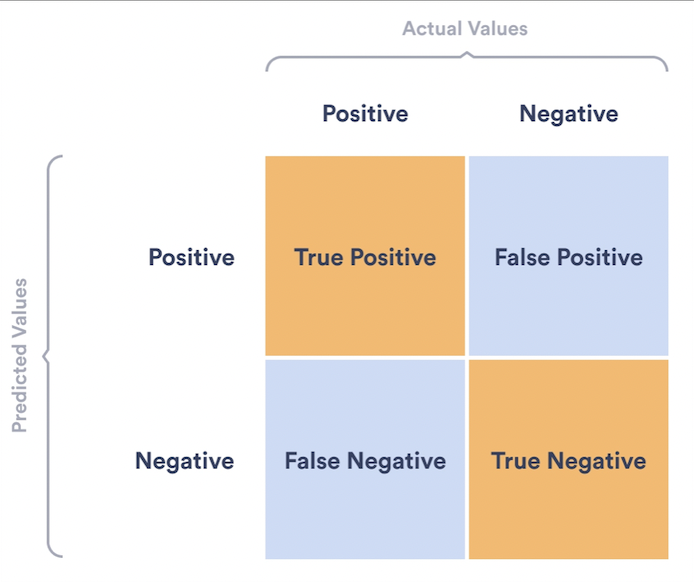


Evaluate the performance using sklearn's confusion matrix like before, and we'll use a seaborn heatmap to display our results. Save the confusion matrix into `conf_matrix`. Use sklearn's confusion_matrix utility.

Additionally, we will use the following set of parameters for our display:



1.   set `annot=True`
2.   `fmt='d'`
3.   colormap set to 'Blues'
4.   colorbar set to False
5.   x and y tick labels set to True
6.   Axes and title labels



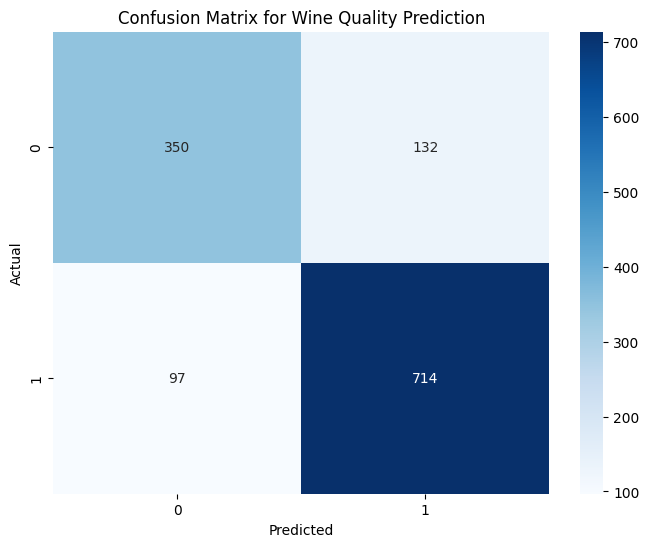

In [47]:
from sklearn.metrics import confusion_matrix

# TODO: Create a Seaborn heat map to display the confusion matrix (manually graded 2 points)
y_pred = best_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 3: Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [48]:
# 2 points
#Grader cell
grader.grade(test_case_id = 'rf_confusion_matrix', answer = (conf_matrix))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.4.6** Confusion Matrix Interpretation [Manually Graded 2 points]

From the confusion matrix above, we see that the model is relatively balanced in its predictions, despite there being a class imbalance in our data. What technique did we use in previous steps helped address the class imbalance and why did it help?

**Respond here:**

# **PART II**: CNN with Pytorch (38 Points)
"Convoluted" Convolutional Neural Networks (Total: 29 points)
So, what are CNNs?

Convolutional Neural Networks are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other.

So what changes? ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

If you wanna know more about how CNNs function and see some cool visualizations, we would highly recommend this [page](https://cs231n.github.io/convolutional-networks/)

<div>
<img src='https://s2.loli.net/2022/11/21/L6pUz2chXWRGn31.png', width='800'>
</div>

We will define the architecture for the CNN we will be using. The components of a CNNs are as follows:

*   Convolutional Layers
*   Pooling Layers
*   Linear Layers
*   Activation Functions

Define a CNN model with Pytorch that contains one or more blocks, where **each block** consists of a **convolutional layer** followed by an **activation function** and a **max pool**. (For this assignment, we discourage adding three or more layers.)

Then, **flatten** the output from the convolutional layers, and pass it through one or more fully connected or 'dense' layers and activation functions after all but the last layer. Note that the output shape from the last layer must be the same as the number of classes.

## 2.1. Data Preprocessing and Preparation for Modeling in `PyTorch` (Total: 10 points)

We will tackle the problem of classifying images.

Specifically, we would be looking at the Modified National Institute of Standards and Technology database ([MNIST](https://en.wikipedia.org/wiki/MNIST_database)) dataset.

[MNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html) dataset consists of 60,000 28x28 grayscale images in 10 classes.

There are 60,000 training images and 10,000 test images.

While it is good to have as much training data as possible, in order to avoid having long training time and potentially running out of GPU, we will downsample and train the model with 30,000 training images and 5,000 testing images.



### Pytorch Dataset and DataLoader (Total: 10 points)

To keep data loading consistent across different models, PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data.

`Dataset` stores the samples and their corresponding labels. And `DataLoader` wraps an iterable around the Dataset to enable easy access to the samples. More information and examples of the objects in action can be found **[here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)**

While Pytorch provides `Dataset` and `Dataloader` for some popular datasets (i.e., one can instantiate the objects and the data is ready to be analyzed in PyTorch Machine Learning pipeline), sometimes we need to define our own custom `Dataset` to process our dataset. The list of available built-in datasets PyTorch gave us can be found **[here](https://pytorch.org/vision/stable/datasets.html)**

<div>
<img src="https://s2.loli.net/2023/03/30/yxbP8gXCroO1Y7c.png", width="800"/>
</div>

Diagram Reference: [Link](https://www.kaggle.com/code/uvxy1234/cifar-10-implementation-with-pytorch)

Dataset class is defined with 3 components:

1.   __init__ : setting up the parameters being used in the class (e.g., `transforms` which corresponds to the transformation being applied)
2.   __len__ : so that len(dataset) returns the size of the dataset.
3.   __getitem__ to support the indexing such that `dataset[i]` can be used to get `i`ith sample (in our case Image, label pair).

To create a custom Dataset object, you would need overide above functions.

Documentation for creating custom dataset can be found [here](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

Luckily, as MNIST is a classic image dataset, we do not need to worry about creating custom `Dataset` and `DataLoader` objects since they are all built into the PyTorch when you import that above.

Complete the missing code in the two sections below.

*   **2.1.1 Instantiate Train and Test Dataset.** $\to$ Load and transform data such that it is ready to be passed into the model
*   **2.1.2 Instantiate Train and Test Dataloader.** $\to$ Put the data into the iterable such that the model is able to process data in batch from using `DataLoader`

### 2.1.1 Instantiate Dataset (for train/test dataset) (6 points)

One optional function in Dataset class is `transform`, where we can apply a transformation to the dataset before we load them as a dataloader.

For example if we define a `Resize` function in transform, all of our dataset(images) would be resized to specified size passed in as an argument.

---
**TODO**: complete the code to apply following transformations (in order!!) by using `transforms.Compose` and save it to the variable `transform`:

1.   Resize the image to 28 by 28 $\to$ just to make sure they are really have size $28x28$
2.   Convert the images to Tensor
3.   Rotate the image using `RandomRotation` with the range of rotation between $(-45°,45°)$
4.   Add random perspective shift using `RandomPerspective` with the distortion of `0.3` to `50%` of the data.
5.   Normalize the Tensor using mean value of `0.1307` and standard deviation value of `0.3081`. Note: do not use square brackets in your syntax.
---
**NOTE**: We highly recommend looking at [PyTorch documentation](https://pytorch.org/vision/stable/transforms.html) before proceeding with the code

Please review the the recitation notebook for detailed instructions on how to perform these operations.

**FYI**: The values `0.1307` and `0.3081` are mean and standard deviation, respectively, of the MNIST dataset [Ref](https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/4)

**NOTE**: Please store the distortion of image in the variable `distortion_scale` since it will be used as an input into the autograder.

In [49]:
scale = 28
# TODO
distortion_scale= 0.3
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.RandomRotation(degrees=(-45, 45)),
    transforms.RandomPerspective(distortion_scale=distortion_scale, p=0.5),
    transforms.Normalize(mean=0.1307, std=0.3081)
])
# TODO END

Now that we have defined the tranforms we are going to apply to the dataset, let's instantiate `Dataset` objects for both the training and testing sets using predefined PyTorch Dataset. Refer to the documentation [here](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html).

In addition, since the whole dataset is pretty large for running the model, we will also be downsampling by reducing the size of the dataset by half.

---
**TODO**:
* Initiate the `Dataset` object for the training set as `train_dataset`
* Downsample training by getting the train data at even-numbered indices, specified as `train_subset`
* Initiate the `Dataset` object for the testing set as `test_dataset`
* Downsample testing by getting the test data at even-numbered indices, specified as `test_subset`
---

**Hint**: Check out [`torch.utils.data.Subset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Subset) for downsampling the dataset.

**Note**: When initiating the `Dataset` object for both training and testing sets, in addition to other arguments please set these arguments as follows:
* `root = './data'`
* `download = True`

In [50]:
# TODO
import torchvision.datasets as datasets
from torch.utils.data import Subset

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_subset = Subset(train_dataset, indices=list(range(0, len(train_dataset), 2)))
test_dataset =  datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_subset = Subset(test_dataset, indices=list(range(0, len(test_dataset), 2)))
# TODO END

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.05MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 66.2kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.09MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.90MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [51]:
print(len(train_dataset))
print(len(test_dataset))
print('=============')
print(len(train_subset))
print(len(test_subset))
print('=============')
transforms_list = []
for i in range(len(train_dataset.transform.transforms)):
  transforms_list.append(str(train_dataset.transform.transforms[i]))
print(transforms_list)
print(len(transforms_list))

60000
10000
30000
5000
['Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)', 'ToTensor()', 'RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)', 'RandomPerspective(p=0.5)', 'Normalize(mean=0.1307, std=0.3081)']
5


In [52]:
#Grader Cell (6 points)
transforms_train = []
for i in range(len(train_dataset.transform.transforms)):
  transforms_train.append(str(train_dataset.transform.transforms[i]))
transforms_test = []
for i in range(len(test_dataset.transform.transforms)):
  transforms_test.append(str(test_dataset.transform.transforms[i]))
grader.grade(test_case_id = 'instantiate_dataset', answer = (transforms_train, transforms_test, len(train_subset), len(test_subset), distortion_scale))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.1.2 Dataloader - Train / Test (4 points)

Now that we have `train_subset` and `test_subset`, let's create dataloaders using these two datasets.

You can load the dataset into dataloaders using the `DataLoaders` object. Please refer to the documentation [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

---
**TODO**:
* Initialize the `DataLoader` object for `train_subset` as `train_loader`
* Initialize the `DataLoader` object for `test_subset` as `test_loader`
---

**NOTE**: set the `batch_size` equal to the previously-defined variable `batch`, set `shuffle` to `True`, and `num_workers` as 0.

In [54]:
batch = 64
# TODO
train_loader = DataLoader(dataset=train_subset, batch_size=batch, shuffle=True, num_workers=0)

test_loader = DataLoader(dataset=test_subset, batch_size=batch, shuffle=True, num_workers=0)

# TODO END

In [55]:
#Grader Cell (4 points)
trainLoaderCheck = [getattr(train_loader, "batch_size"),
                    str(type(train_loader)),
                    len(getattr(train_loader, "dataset")),
                    str(getattr(train_loader, "sampler")),
                    getattr(train_loader, "num_workers")]
testLoaderCheck = [getattr(test_loader, "batch_size"),
                    str(type(test_loader)),
                    len(getattr(test_loader, "dataset")),
                    str(getattr(test_loader, "sampler")),
                    getattr(test_loader, "num_workers")]
grader.grade(test_case_id = 'check_dataloader', answer = (trainLoaderCheck, testLoaderCheck))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


The following code helps you to visualize the dataset

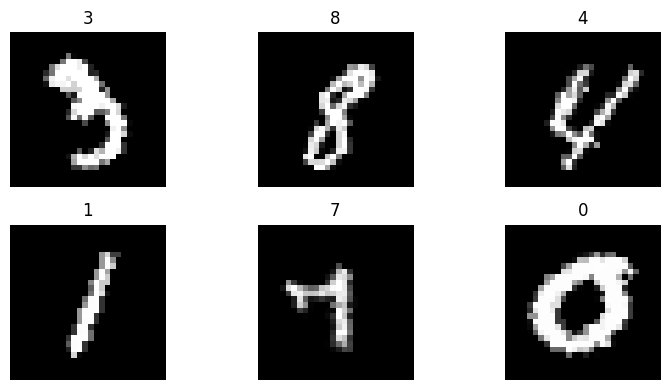

In [56]:
torch.manual_seed(42)
sample_idxs = [10, 300, 700, 2708, 5035, 8000] # DO NOT MODIFY

# loop through the length of tickers and keep track of index

plt.figure(figsize=(8,4))

for n, sample_idx in enumerate(sample_idxs):
    # get data and label
    data, label = train_dataset[sample_idx]
    data = data.permute(1,2,0).detach().cpu().numpy()
    # add a new subplot iteratively
    ax = plt.subplot(2, 3, n + 1)

    # show the image in grayscale
    ax.imshow(data, cmap='gray')

    # chart formatting
    ax.set_title(label)
    ax.grid(False)
    ax.axis('off')

plt.tight_layout()
plt.show()


## 2.2 Model Architecture (15 points)

### 2.2.1 Calculating Output Dimensions of Convolution and Pooling Layers (3 Points)

Before we start building the architecture, it's important to understand the dimensions of the feature maps produced in each of the convolution and pooling layers. We want to keep track of this information as once we get to the fully-connected layers, we need to specify the number of input parameters.

Let's first build a function that will help us calculate the dimensions based on the input parameters.


Since we are working with squared image, we will build just one function that can be used to calculate both the H (height) and W (width) of the feature map.

Below is the function used to calculate the output dimension of the feature map:

<div>
<img src='https://s2.loli.net/2023/03/30/lKpjPLVHcuRC8n2.png',width='300'/>
</div>

Diagram Reference: [Link](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

---
**TODO:**

Build the **feature_map_dim** function, which takes in the following four parameters and return the dimension of the output feature map.

- **input_dim**: height/width of the input image

- **kernel_size**: size of the convolving kernel (aka. filter)

- **padding**: padding added to all four sides of the input in order to preserve the edges/borders

- **stride**: Stride of the convolution, or how many shifts per kernel
  
ROUND DOWN if the result is a fraction.

---

Notice there is another parameter, "dilation", which is the spacing between kernel elements. We have not covered this in class; simply set it to 1.

In [57]:
import math

def feature_map_dim(input_dim, padding, kernel_size, stride):
  '''
  The function takes in the following four parameters and return the dimension of the output feature map.

  input_dim: height/width of the input image
  kernel_size: size of the convolving kernel (aka. filter)
  padding: padding added to all four sides of the input in order to preserve the edges/borders
  stride: Stride of the convolution, or how many shifts per kernel

  ROUND DOWN if the result if a fraction.

  Notice there is another parameter, "dilation", which is the spacing between kernel elements. We have not covered this in class; simply set it to 1
  '''
  ## TODO:
  # Set dilation to 1 as specified
  dilation = 1

  output_dim = ((input_dim + 2 * padding - dilation * (kernel_size - 1) - 1) / stride) + 1
  output_dim = math.floor(output_dim)

  ## END TODO
  return output_dim

In [58]:
student_ans_1 = feature_map_dim(28, 1, 3, 1)
student_ans_2 = feature_map_dim(28, 2, 4, 2)
student_ans_3 = feature_map_dim(17, 0, 2, 2)
student_ans = [student_ans_1, student_ans_2, student_ans_3]

In [59]:
#Grader Cell (3 points)
grader.grade(test_case_id = 'test_feature_map_dim', answer = student_ans)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.2.2 Convolutional Neural Network Model Architecture (12 points)

---
**TODOs:**

`def __init__(self)`::
1.  Initialize 1 - 3 `convolutional blocks` (consists of a convolution layer, an activation function, and a Pooling layer)

2. `Flatten` the output of the convolution to a tensor

3. Initialize 1-3 `fully-connected layers`

`def forward(self, x)`:
4. Build the `forward` function/path with the layers initialized in `__init__` function.

---

- **Note:** While parameters of convolution layers tend to vary, it is possible to use the same pooling layer and activation function in each block. If you intend to use the same parameters for these two elements, then only 1 pooling layer and 1 activation function needs to be initialized.
- **Hint 1**: Use the `feature_map_dim` function, and the input_dim and output_dim comments to help you keep track of the input/output dimensions of each layer
- **Hint 2**: The parameters you've calculated is particularly useful for the input dimensions for the linear layer in the first fully-connected layer.
- **Hint 3**: Each input is a grey-scaled (1 channel) 28 x 28 image.
- **Hint 4**: The final fully-connected layer's output dimension should be the same as the number of classes in our dataset


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO

        # 1. Initialize 1 - 3 convolution blocks (consists of a convolution layer, an activation function, a MaxPooling layer)

        # Convolution Block 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=2, stride=1, padding=0)  # 28x28 -> 27x27
        # input dim = 1 channels, with image size 28 x 28
        # output dim = 5 channels, with image size 27 x 27
        self.mp1 =
        # default stride is the same as the kernel size
        # input dim = 5 channels, with image size 27 x 27
        # output dim = 5 channels, with image size 13 x 13
        self.relu =

        # Convolution Block 2 ... Feel free to add 1 - 2 more convolution blocks
        self.conv2 =
        # input dim = 5 channels, with image size 13 x 13
        # output dim = 10 channels, with image size 12 x 12

        # 2. Flatten the 2D image into a 1D tensor
        self.flatten =

        # 3. Initialize 1-3 fully-connected layers
        self.fc1 =
        self.fc2 =

        # END TODO

    def forward(self, x):
        # TODO

        # 1. Pass the images (x) through convolution block 1 and (block 2, 3 if you have built them)
        outputs =
        outputs =

        # 2. Flatten the image
        outputs =

        # 3. Pass the output through the fully-connected layers (remember to build in an activation functions)
        outputs =
        outputs =

        # END TODO
        return outputs

Let's print out the model summary

In [ ]:
CNN()

In [ ]:
#Grader Cell (12 points)
grader.grade(test_case_id = 'cnn_model', answer = str(CNN()))

## 2.3 Model Training (10 Points)

### 2.3.1 Training CNN Model (10 Points)

---
**TODOs**
1.   Instantiate the CNN to the variable `cnn` (make sure to send this to the device env)
2.   Set the criterion as a CrossEntropyLoss (you can look up the documentation [here](https://pytorch.org/docs/stable/nn.html#loss-functions)). CrossEntropyLoss works well for multi-class classification because it’s designed to handle probability distributions. It’s commonly used with outputs from a softmax layer, where the model produces probabilities for each class.
3.   Fill in the missing parts in the training loop.
4.   Calculate training accuracy for each epoch (should multiply by 100 to get percentage), store in variable called `accuracy`.
5.   Save the Training Accuracy for every epoch into `acc_LIST_CNN`
6.   Save the Average Loss for every epoch into `loss_LIST_CNN`

**Please do not modify the following set ups: **
- Optimizer: The optimizer is set as "Adam".
- Epoch: The epoch is set to "10".

---

**Hint:** Remember to update the weights correctly by backpropagation, please zero out the gradients by calling `optimizer.zero_grad()` every time you call `backward()`. Please review the `Recitation 10` for detailed instructions on how to perform these operations.

**Note 1**: If the loss went up during the training, there is something wrong with the model, so you should check if the model is implemented correctly.

**Note 2**: Typical training time takes between 5 - 10 mins.

**Note 3**: `acc_LIST_CNN` and `loss_LIST_CNN` should contain data of type float not tensor.

In [ ]:
%%time
# Sending the data to device (CPU or GPU)
# TODO
cnn =
criterion =
# END TODO
optimizer = optim.Adam(cnn.parameters(), lr=1e-4) #lr - learning step
epoch = 10

acc_LIST_CNN = []
loss_LIST_CNN = []

# Train the CNN
for epoch in range(epoch):
  running_loss = 0.0
  correct = 0
  total = 0
  for inputs, labels in train_loader:
      labels = labels.type(torch.LongTensor) # Cast to Float
      inputs, labels = inputs.to(device), labels.to(device)
      # TODO
      # Step 1: Reset the optimizer tensor gradient every mini-batch


      # Step 2: Feed the network the train data
      outputs =
      # Step 3: Get the prediction using argmax
      predictions =

      # Step 4: Find average loss for one mini-batch of inputs
      loss =
      # Step 5: Do a back propagation

      # Step 6: Update the weight using the gradients from back propagation by learning step

      # Step 7: Get loss and add to accumulated loss for each epoch
      running_loss +=

      # Step 8: Get number of correct prediction and increment the number of correct and total predictions after this batch
      # Hint: we need to detach the numbers from GPU to CPU, which stores accuracy and loss
      correct +=
      total +=

  # Step 9: Calculate training accuracy for each epoch (should multiply by 100 to get percentage), store in variable called 'accuracy', and add to acc_LIST_CNN
  accuracy =
  acc_LIST_CNN.append(accuracy)

  # Step 10: Get average loss for each epoch and add to loss_LIST_CNN
  loss_LIST_CNN.append( / len(train_loader))

  # END TODO

  # print statistics
  print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(train_loader), accuracy))


In [ ]:
# (if applicable)
# In order to pass the AutoGrader, every element in "acc_LIST_CNN" should be a float.
# If the elements are of type "Tensor", convert each element into type FLOAT by using .item() or .tolist()
# To check if each element is a Tensor, print out "acc_LIST_CNN" and see if there is a Tensor() wrapped around each element.
acc_LIST_CNN = [x.item() for x in acc_LIST_CNN]


In [ ]:
#Grader Cell (10 points)
grader.grade(test_case_id = 'cnn_train_loss', answer = (acc_LIST_CNN, loss_LIST_CNN))

## 2.4 Model Testing (2 Points)

### 2.4.1 CNN Model Test Accuracy (2 points)

---
**TODO:**
Calculate the Test Accuracy for the CNN Model we trained above. Save it to the variable named `test_acc_CNN`.
Note: Please do not use .item() before the printing statement.

---

In [ ]:
# TODO
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        images, labels = images.to(device), labels.to(device)
        # TODO
        # Get the output
        outputs =
        # Get the prediction using argmax
        predictions =
        # Get number of correct prediction and add to correct and total
        correct +=
        total += len(labels)

# Calculate test accuracy for CNN (should multiple by 100)
test_acc_CNN = 100 * correct / total
# TODO END

print(f'Test Accuracy: ' + str(test_acc_CNN.item()))

In [ ]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'cnn_test_acc', answer = (test_acc_CNN.item()))

## 2.5.1 Reflection (1 Point)

[Multiple Choice Question] Considering the total time used for training the CNN, would it be efficient to use cross-validation in this case?

A. Yes
B. No

In [ ]:
# TODO
your_choice = ""
# TODO END

In [ ]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'reflection', answer = your_choice)

# PART III: Natural Language Processing (19 Points)

Whew! That was tough. Stay with us for a little more. In this section, we’ll use Natural Language Processing ([NLP](https://www.geeksforgeeks.org/natural-language-processing-overview/)) techniques to classify the sentiments of IMDB reviews. We will use a pre-trained transformer model from Hugging Face for embedding generation and train a classifier using scikit.

First let's load the data from Kaggle. Run the cell below to import the dataset.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
imdb_df = pd.read_csv(f"{path}/IMDB Dataset.csv")

In [ ]:
imdb_df.head()

## 3.1 Preprocessing the Data (7 points)

### 3.1.1 Prepare the Data (1 points)

The dataset that we downloaded above is very large and has 50,000 reviews. To train our model on the data in reasonable time, we will not be using all of them.

**TODOS**

1. Select the first 3,000 reviews
2. Lowercase the **review** column

In [ ]:
# TODO
# 1. Select the first 3000 reviews
# 2. Lowercase the review column

imdb_df =
imdb_df['review'] =

print(imdb_df['review'].head(10))

# TODO END

In [ ]:
#Grader Cell (1 points)
grader.grade(test_case_id = 'test_preprocessing', answer = imdb_df)

### 3.1.2 Removing HTML tags from the text (2 points)

HTML tags are often present in datasets that have been scraped from the web. We want to remove them because they do not add much value when analyzing sentiment.

**TODOS**

1. Remove HTML tags from the reviews (think back to the first half of the semester)

In [ ]:
# TODO
# Remove HTML tags from the reviews

In [ ]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'test_remove_html_tags', answer = imdb_df)

### 3.1.3 Removing stopwords (2 points)

Stopwords are words that have little to no significance when constructing meaningful features from text. For example words like "a", "is", "the", etc. are all stop words. There isn't one unified list of stopwords, but here, we use stopwords as defined in [NLTK](https://www.nltk.org/). Stopwords are stored in the array `stopwords` defined in Part 0.

In [ ]:
# TODO
# Remove stopwords from the reviews


In [ ]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'test_remove_stopwords', answer = imdb_df)

### 3.1.4 Splitting the data into Test/Train (2 points)

Finally, you should split the data into training samples and testing samples (use an 80-20 split)

In [ ]:
# TODO
# Split the data into train and test samples

In [ ]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'test_train_test_split', answer = (X_train, X_test, y_train, y_test))

## 3.2 Generating Embeddings (8 points)

Before we get to coding, I guess a question you lot are asking is **what are embeddings?**

Don't worry, I got you.

Embeddings are basically a way to transform text data into numerical representations that machine learning models can understand. The reason we use them is that raw text cannot be directly fed into most ML algorithms - they require numerical inputs. There are many traditional methods of generating embeddings like Word2Vec or GloVe. However, they only generate static embeddings.

**BERT** (a transformer based model - **what's a transformer?** you should've went to class, naughty) on the other hand, creates contextual embeddings. What that means is that the meaning of a word changes depending on the surrounding words. The word "bank" for example, will have different embeddings in "river bank" and "money bank".

Let's load the DistilBERT Tokenizer and Model (DistilBERT is a smaller version of BERT).

In [ ]:
# DO NOT MODIFY

from transformers import DistilBertTokenizer, DistilBertModel

# Load the tokenizer and model from Hugging Face
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Set the model to evaluation mode (this speeds up processing)
model.eval()

Finally, the good stuff. Here you need to generate embeddings of each review so we can train our logistic regression model on it.

**TODOS**
1. Tokenize the input text, but make sure to:
    - add special tokens
    - set max length for padding/truncating
    - pad sequences
    - truncate longer texts
    - return pytorch tensors
   
   Look at [this documentation](https://huggingface.co/docs/transformers/en/main_classes/tokenizer) from Hugging Face (I suggest using `tokenizer()` for tokenizing)
2. Pass the tokenized input to the model (`input_ids` field) and extract the output embedding for the `[CLS]` token

   * We use the `[CLS]` token because it represents the entire sequence and is useful for classification tasks.

  **Hint:** use `.squeeze().numpy()` to turn the tensor into an array for easier handling

3. Store the embeddings in a list
4. Get the train and test embeddings

In [ ]:
# this may take awhile to run
def get_embeddings(texts, tokenizer, model, max_len=128):
    embeddings = []

    for text in texts:
        # TODO: Tokenize the text

        with torch.no_grad():
            # TODO: Get the embeddings from the model

            # TODO: Get the embedding of the [CLS] token and add it to our embeddings array

    return embeddings

# TODO: get train and test embeddings


In [ ]:
#Grader Cell (8 points)
grader.grade(test_case_id = 'test_tokenization_and_cls_embedding', answer = (len(train_embeddings), len(X_train), train_embeddings[0].sum(), len(train_embeddings[0])))

## 3.3 Training a classifier on the embeddings (4 points)

### 3.3.1 Logistic Regression (3 points)

Finally, we can train a Logistic Regression model on the embeddings that we generated in the previous section.

**TODOS**

1. Fit a Logistic Regression model on the train embeddings (experiment with `max_iters` if you're getting a low accuracy score)
2. Get the predictions from the test embeddings
3. Calculate the accuracy score `acc_score` of your predictions

In [ ]:
# TODO
# Fit a Logistic Regression model
# Get predictions

predictions =

acc_score =

print(acc_score)

In [ ]:
#Grader Cell (3 points)
grader.grade(test_case_id = 'test_logreg', answer = (len(y_test), len(predictions), acc_score))

### 3.3.2 Classification Report (Manually Graded 1 point)

Run the cell below to see the performance of our trained model. As you can see that it doesn't perform as well as we want it to. This is a good start but there's room for improvement. One thing that we could do is:

- We can fine-tune DistilBERT on the specific dataset to improve performance


In [ ]:
print(classification_report(y_test, predictions))

What are some other strategies we could use to improve performance? Fill in the cell below.

In [ ]:
strategies = """

"""

print(strategies)

The above is manually graded which means.... That you're done! Good stuff.

# Homework Submission

Good job! You have finished the homework :) The submission instructions are as follows:

* **Double check** that you have the correct PennID (all numbers) in the autograder.

* **Triple check** that you fulfilled all the requirements mentioned in the beginning of the notebook. Particularly, that your .ipynb does not show "Large File Hidden" in the code tab in Gradescope.

*  Go to the "File" tab at the top left of the Colab UI, click "Download .ipynb" and then "Download .py".  **Rename** these two files to `homework4.ipynb` and `homework4.py` respectively and upload them to Gradescope.

* You must submit your notebook to receive credit. Post any issues with submission on Ed and make sure to keep in mind the late day policy.

* After you submit your code, the teaching staff will manually grade your Colab notebook in order to validate the correctness of your code.